In [18]:
import numpy as np
import matplotlib.pyplot as plt

N = 500
lambd = 500 * 10**(-9)
k = 2 * np.pi /lambd

In [19]:
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
f_xy = np.sign(X) * np.abs(X)**2.5 + np.sign(Y) * np.abs(Y)**2.5
phase_mask = np.exp(1j * k * f_xy)  # Фазовый множитель

In [20]:
H = np.fft.fft2(phase_mask)

In [21]:
U_0 = np.zeros((N, N))
U_0[N//2, N//2] = 1  # Точечный источник
U_dist = U_0 * phase_mask

In [22]:
epsilon = 1e-3  # Регуляризация
U_rec = np.fft.ifft2(np.fft.fft2(U_dist) / (H + epsilon))

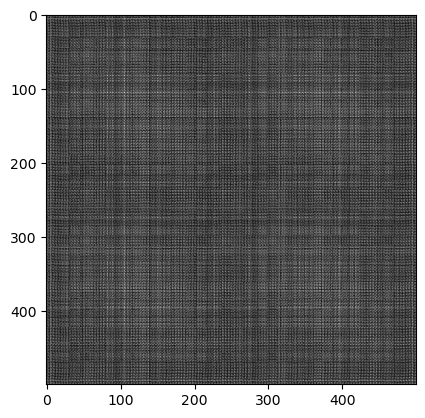

In [23]:
plt.imshow(np.abs(U_rec), cmap='gray')